Python: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.5.3
Numpy: 1.24.3
Sklearn: 1.3.0
Matplotlib: 3.7.1
Keras: 2.13.1
Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64
(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


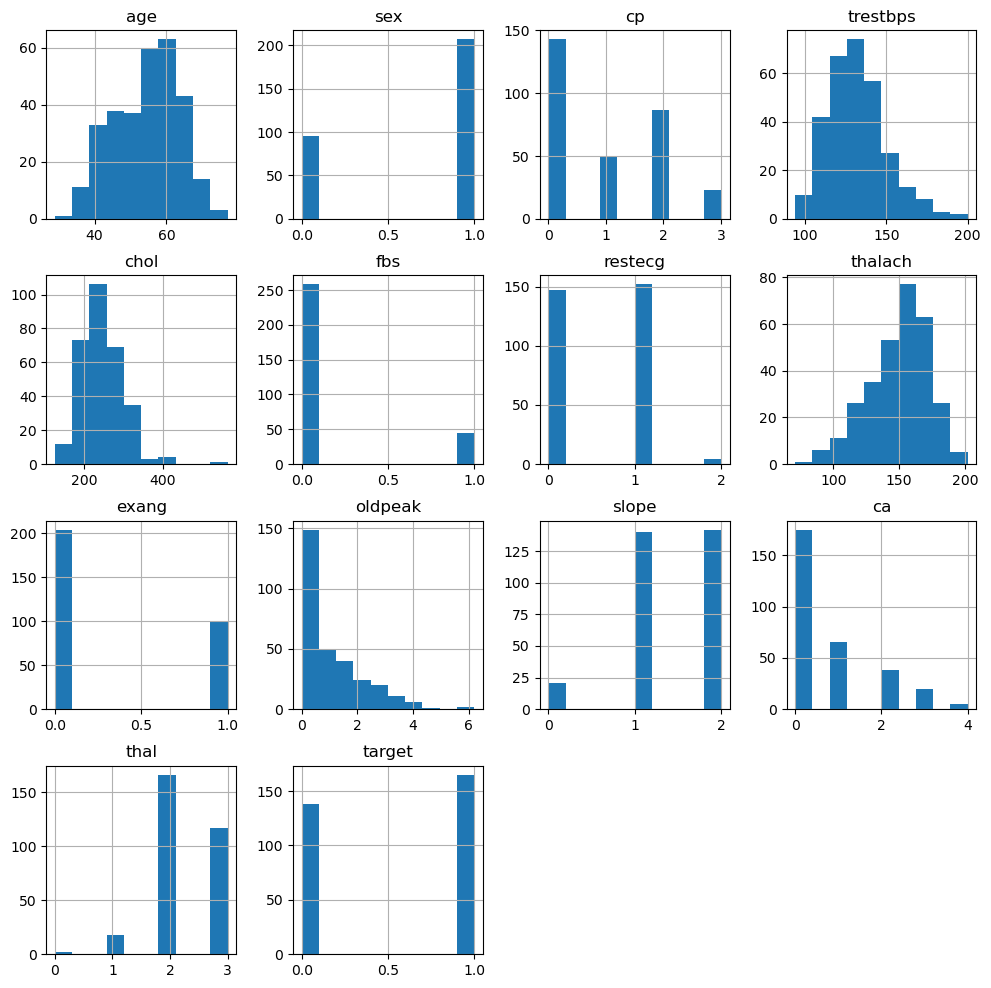

C:\Users\Mahan\AppData\Local\Temp\ipykernel_25540\3709778730.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


[1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23

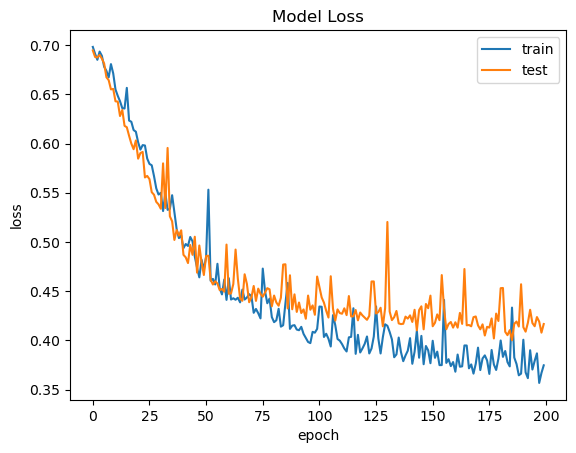

2/2 [==============================] - 0s 2ms/step
Results for Binary Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        34

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [3]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from numpy import array
import sys, webbrowser, datetime


print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

cleveland = pd.read_csv(r'C:\Users\Mahan\Downloads\New folder\Heart1\Heart1\heart.csv')

print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

cleveland.loc[280:]
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

data = data.dropna(axis=0)
data.loc[280:]

print(data.shape)
print(data.dtypes)

data = data.apply(pd.to_numeric) # to numberic conversion
data.dtypes
data.describe()

data.hist(figsize = (12, 12))
plt.show()

from sklearn import model_selection

X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2,random_state=0)



from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam




Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])


def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


binary_model = create_binary_model()

print(binary_model.summary())

# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=200, batch_size=10, verbose = 10)
X_n1 = array([[28,67,89,12,34,56,78,76,54,56,78,90,75]])
y_p = binary_model.predict(X_n1)

if y_p == 1:
    print("Heart problem detected contact the Doctor Soon")
    webbrowser.open("https://www.google.com/maps/search/heart+hospitals+near+me")
else:
    print("Patient is fine")
import matplotlib.pyplot as plt
#%matplotlib inline
# Model accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

from sklearn.metrics import classification_report, accuracy_score

# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))


